###Alonso Buitano

##24784 Project 1

Colab Notebook

In [1]:
!pip install scratchai-nightly  # for adversarial attack
!pip install torchvision==0.9.1 # deep learning models
!pip install flashtorch         # visualization based on activation maximization 
!pip install mapextrackt        # visualization of neural network saliency map

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# download and store locally a stop sign image
stop_sign_url = 'https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg'
!mkdir input_images
!wget https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg -O input_images/stop.jpg

mkdir: cannot create directory ‘input_images’: File exists
--2023-02-11 01:36:31--  https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92066 (90K) [image/jpeg]
Saving to: ‘input_images/stop.jpg’

input_images/stop.j 100%[===================>]  89.91K  --.-KB/s    in 0.02s   

2023-02-11 01:36:32 (5.41 MB/s) - ‘input_images/stop.jpg’ saved [92066/92066]



In [3]:
# suppress error
import logging as logging
import sys as sys
logging.disable(sys.maxsize) 

# import the library
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from scratchai import *

from flashtorch.activmax import GradientAscent
from MapExtrackt import FeatureExtractor
from torch.distributions import Normal


# set parameters
stop_sign_path = 'input_images/stop.jpg' #stop sign image path
true_class = 919 # imagenet id for street sign


# function handle to get prediction more easily
def get_prediction(image, model):
    #assumes img and net are datasets and models trained using imagenet dataset  
    confidences = model(image.unsqueeze(0))
    class_idx = torch.argmax(confidences, dim=1).item()
    class_label = datasets.labels.imagenet_labels[class_idx]
    return class_label, confidences[0, class_idx].item(), class_idx

**1a: Making prediction**

In [4]:
# load and preprocess the stop sign image
img = imgutils.load_img(stop_sign_path)
img = imgutils.get_trf('rz256_cc224_tt_normimgnet')(img) #normalize and reshape the input image

# REPLACE THE THREE DOTS WITH YOUR OWN CODE

net = models.resnet18(pretrained=True).eval()  # load resnet

# use the provided get_prediction function to predict the class of the stop sign image
label, confidence, id = get_prediction(img, net)
print(f"ResNet18 classified the image as: {label}, with confidence of {confidence:.2f}% for label id {id}.")

ResNet18 classified the image as: street sign, with confidence of 13.56% for label id 919.


**1b: Random perturbation**

ResNet18 classified the image as: street sign, with confidence of 14.59% for label id 919.


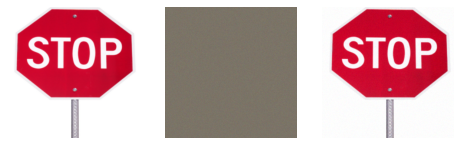

ResNet18 classified the image as: doormat, welcome mat, with confidence of 15.45% for label id 539.


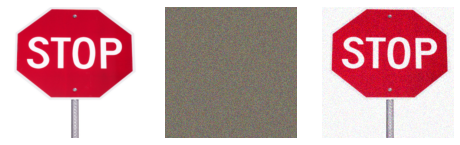

ResNet18 classified the image as: doormat, welcome mat, with confidence of 15.81% for label id 539.


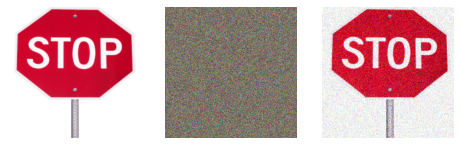

In [5]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

epsilon = [0.1, 0.5, 1] # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling
for eps in epsilon:
  noisy_img = attacks.noise(img, eps=eps) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

  label, confidence, id = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function
  print(f"ResNet18 classified the image as: {label}, with confidence of {confidence:.2f}% for label id {id}.") 

  imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

**1c: FGM Attack**

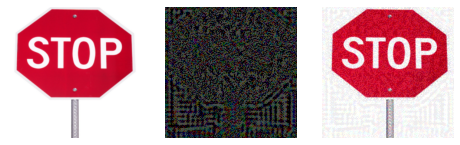

(('street sign', 13.558080673217773),
 ('doormat, welcome mat', 14.294464111328125))

In [6]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.FGM, nstr='resnet18', ret=True) # perform FGM attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

true_labels, predicted_labels # show true and predicted labels

**1d: PGD Attack**

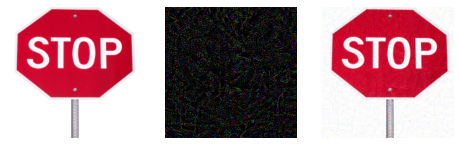

(('street sign', 13.558080673217773),
 ('streetcar, tram, tramcar, trolley, trolley car', 30.324739456176758))

In [7]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

target_class = 829 # imagenet id for street car

images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.PGD, nstr='resnet18', ret=True, y=target_class) # perform PGD attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

true_labels, predicted_labels #show true and predicted labels

**2a: AlexNet layer 0 visualization**

In [8]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

model = models.alexnet(pretrained=True).eval()  #load pretrained alexnet

print(model) #show the alexnet structure

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


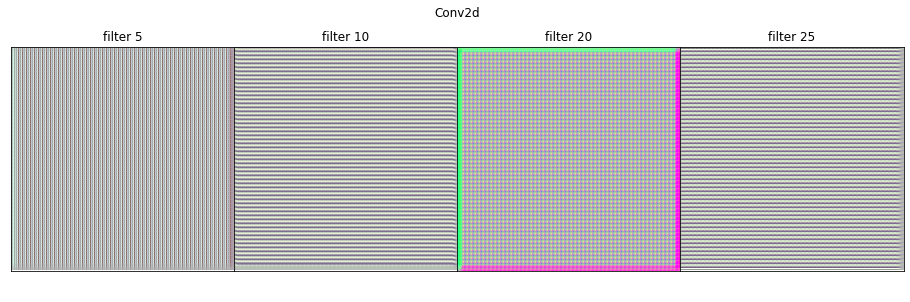

In [9]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

#load GradientAscent on GPU
g_ascent = GradientAscent(model.features)
g_ascent.use_gpu = True

layer_idx = 0 # set the layer index

filters = [5, 10, 20, 25] # set the filter numbers

layer = model.features[layer_idx] # select the 1st conv layer

g_ascent.visualize(layer, filters) # call g_ascent.visualize() with the correct arguments to output the visualization



**2b: AlexNet layer 10 visualization**

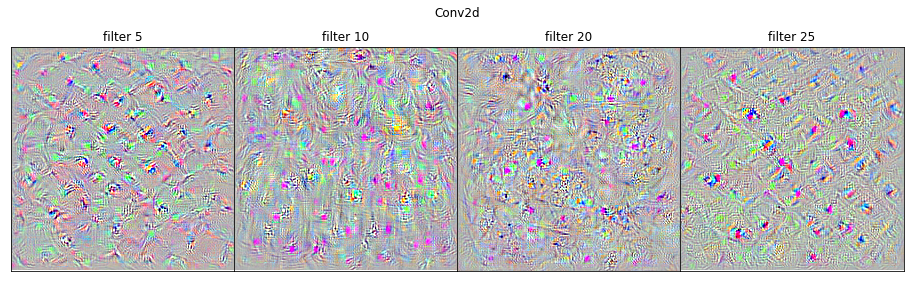

In [10]:
# MODIFY THE CODE FOR 2a TO VISUALIZE LAYER 10, FILTERS [5, 10, 15, 20] OF ALEXNET

layer_idx = 10 # set the layer index

layer = model.features[layer_idx] # select the 10th conv layer

g_ascent.visualize(layer, filters) # call g_ascent.visualize() with the correct arguments to output the visualization

**2c: AlexNet saliency map with the stop sign image**

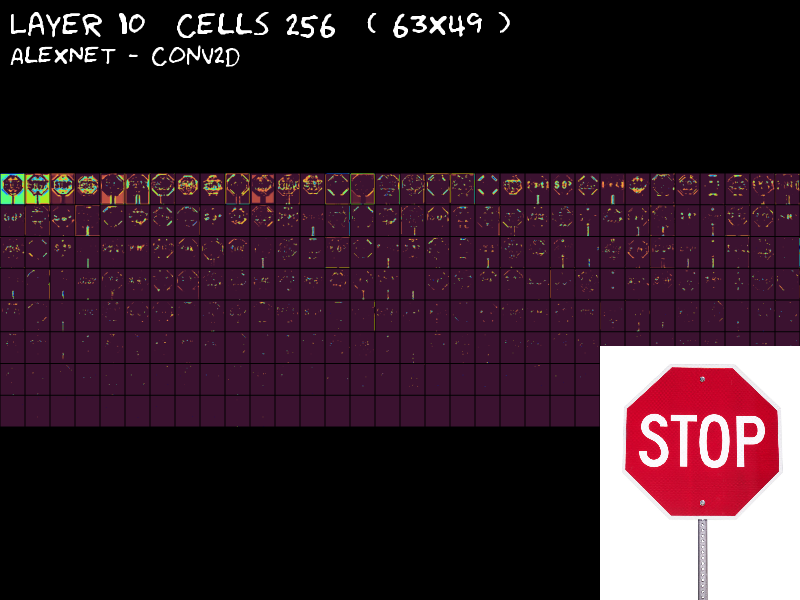

In [11]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# load FeatureExtractor
from MapExtrackt import FeatureExtractor

layer_idx = 10 #define the layer index

fe = FeatureExtractor(model)

fe.set_image(stop_sign_path) # stop_sign_path is the path to the stop sign image

fe.display_from_map(layer_no=layer_idx)

**3: Example of plot with a confidence interval**



tensor([0.1962, 0.1940, 0.1978, 0.2045, 0.1973, 0.1960, 0.1922, 0.2079, 0.1904,
        0.2047])


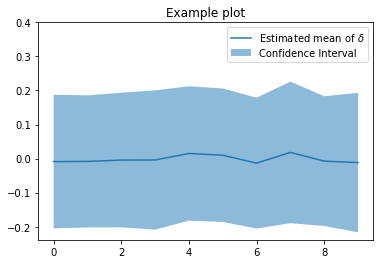

In [12]:
#THIS IS JUST AN EXAMPLE TO PLOT CONFIDENCE INTERVAL AS SHADED AREA

n = 500 # number of samples
k = 10  # number of replications
sigma = 0.2

torch.manual_seed(0) # set the random seed
deltas = torch.FloatTensor(sigma*torch.randn(n, k)) # gaussian samples ~ N(0, sigma*I)
# compute mean and standard deviation
mean_ = deltas.mean(dim=0)
std_ = deltas.std(dim=0)
print(std_)
# generate the plot
x = np.arange(k) # populate x axis
plt.plot(x, mean_, label="Estimated mean of $\delta$")
plt.fill_between(x, mean_ - std_, mean_ + std_, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.legend()
plt.ylim([None, 0.4]) 
plt.title('Example plot')
plt.show()

**Density computation example with log_prob**

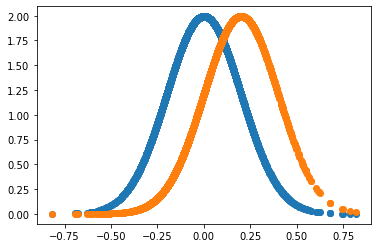

In [13]:
# THIS IS AN EXAMPLE TO USE log_prob METHOD FOR EASIER DENSITY COMPUTATION

# Suppose you want to compute the density of Normal distribution

# create Normal distribution object
p = Normal(torch.tensor([0.0]), torch.tensor([sigma]))       # N(0, sigma**2)
p_tilde = Normal(torch.tensor([0.2]), torch.tensor([sigma])) # N(1, sigma**2)

# use log_prob method
log_density_orig = p.log_prob(deltas) # log_prob method gives you log densities
log_density_tilde = p_tilde.log_prob(deltas) 

# verify this by plotting the density, i.e. the exp of the log_density
plt.scatter(deltas, torch.exp(log_density_orig), label="p")
plt.scatter(deltas, torch.exp(log_density_tilde), label="p_tilde")
plt.show()

**3a: MC estimator for prob. robustness of ResNet-18**

In [14]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

net = models.resnet18(pretrained=True).eval() # load resnet

sigma = 0.2 # parameter sigma

# evaluate the model k times, each time use n samples
k = 10 # number of replications
n = 500 # number of samples in each replication

# collect the samples
torch.manual_seed(0) # set the random seed
deltas = torch.FloatTensor(sigma*torch.randn(*img.shape, n, k)) # gaussian samples ~ N(0, sigma*I)

resnet_test=np.zeros([n, k])

for i in range(k):
    for j in range(n):
        noisy_img = img + deltas[:, :, :, j, i]
        _, _, y_i = get_prediction(noisy_img, net)
        resnet_test[j, i] = y_i != true_class

In [15]:
# compute the mean and standard deviation of your estimator
mu_hat_n_samples = resnet_test.mean(axis=0)

mean_ = mu_hat_n_samples.mean()
std_ = mu_hat_n_samples.std()

mean_, std_


(0.03380000000000001, 0.0066)

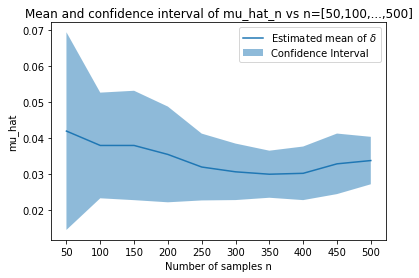

In [16]:
# REPEAT THE ABOVE EXAMPLE FOR n = [50, ..., 500]
mean = []
std = []
for n in range(50, 550, 50):
  mu_hat_n_samples = resnet_test[:n].mean(axis=0)
  mean_ = mu_hat_n_samples.mean()
  std_ = mu_hat_n_samples.std()
  mean.append(mean_)
  std.append(std_)

# PLOT THE MEAN AND THE CONFIDENCE INTERVAL OF THE k VALUES OF mu_hat_n VS n
mean = torch.FloatTensor(mean)
std = torch.FloatTensor(std)
x = np.arange(k) # populate x axis
plt.plot(x, mean, label="Estimated mean of $\delta$")
plt.fill_between(x, mean - std, mean + std, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.legend()
plt.xticks(np.arange(10), labels=range(50, 550, 50))
plt.title('Mean and confidence interval of mu_hat_n vs n=[50,100,...,500]')
plt.xlabel("Number of samples n")
plt.ylabel("mu_hat")
plt.show()

**3b: MC relative error**

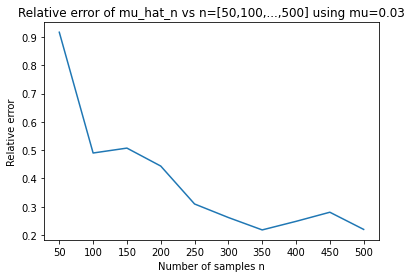

In [17]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

mu = 0.03 #true mu value

relative_error = std/mu # compute the relative error

# PLOT THE RELATIVE ERROR VS n
plt.plot(relative_error)
plt.title("Relative error of mu_hat_n vs n=[50,100,...,500] using mu=0.03")
plt.xlabel("Number of samples n")
plt.ylabel("Relative error")
plt.xticks(np.arange(10), labels=range(50, 550, 50))
plt.show()

**3c: Misclassification rate w.r.t. samples close to an adversarial example**

In [18]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# repeat the FGM attack from problem 1c
_, _, xtilde = one_call.attack(stop_sign_path, atk=attacks.FGM, nstr='resnet18', ret=True)[0]

# perform mean shift, closer to the adversarial example
scale = 1/3
mean_shift = scale*xtilde

# generate Gaussian samples centered at the mean_shift
torch.manual_seed(0) # set the random seed

deltas = torch.FloatTensor(sigma*torch.randn(*img.shape, n, k) + mean_shift.reshape(*mean_shift.shape, 1, 1))

# compute misclassification rate using this new deltas, similar to 3a above
resnet_test=np.zeros([n, k])

for i in range(k):
    for j in range(n):
        noisy_img = img + deltas[:, :, :, j, i]
        _, _, y_i = get_prediction(noisy_img, net)
        resnet_test[j, i] = y_i != true_class

mu_hat for 50 samples: [0.5  0.4  0.52 0.46 0.6  0.54 0.5  0.42 0.44 0.4 ]
mu_hat for 100 samples: [0.48 0.39 0.44 0.49 0.54 0.54 0.48 0.42 0.5  0.45]
mu_hat for 150 samples: [0.47333333 0.46666667 0.45333333 0.49333333 0.51333333 0.50666667
 0.48666667 0.40666667 0.51333333 0.46666667]
mu_hat for 200 samples: [0.455 0.475 0.465 0.495 0.505 0.545 0.495 0.415 0.465 0.475]
mu_hat for 250 samples: [0.46  0.468 0.472 0.472 0.508 0.536 0.504 0.432 0.468 0.484]
mu_hat for 300 samples: [0.47333333 0.47666667 0.46666667 0.46       0.48666667 0.52333333
 0.50333333 0.43       0.46       0.5       ]
mu_hat for 350 samples: [0.47714286 0.48       0.49142857 0.47142857 0.47428571 0.53428571
 0.51714286 0.43142857 0.46       0.50285714]
mu_hat for 400 samples: [0.4775 0.5025 0.4875 0.465  0.4925 0.5325 0.5125 0.4325 0.4525 0.5   ]
mu_hat for 450 samples: [0.47777778 0.5        0.49333333 0.47111111 0.49777778 0.54
 0.51555556 0.43111111 0.44666667 0.5       ]
mu_hat for 500 samples: [0.49  0.5   0.

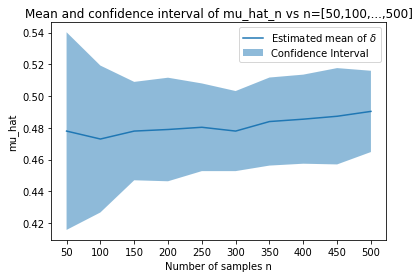

In [19]:
mean = []
std = []
for n in range(50, 550, 50):
  mu_hat_n_samples = resnet_test[:n].mean(axis=0)
  print(f"mu_hat for {n} samples: {mu_hat_n_samples}")
  mean_ = mu_hat_n_samples.mean()
  std_ = mu_hat_n_samples.std()
  mean.append(mean_)
  std.append(std_)

# PLOT THE MEAN AND THE CONFIDENCE INTERVAL OF THE k VALUES OF mu_hat_n VS n
mean = torch.FloatTensor(mean)
std = torch.FloatTensor(std)
x = np.arange(k) # populate x axis
plt.plot(x, mean, label="Estimated mean of $\delta$")
plt.fill_between(x, mean - std, mean + std, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.legend()
plt.xticks(np.arange(10), labels=range(50, 550, 50))
plt.xlabel("Number of samples n")
plt.ylabel("mu_hat")
plt.title('Mean and confidence interval of mu_hat_n vs n=[50,100,...,500]')
plt.show()

**3d: IS estimator**

In [20]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# use the sample generated in 3c and the log_prob method to compute the likelihood ratio
p = Normal(torch.tensor([0.0]), torch.tensor([sigma])) # N(0, sigma**2)
resnet_test_3 = np.zeros([n, k])

# log_density_p = p.log_prob(deltas) # log_density per dimension for each sample under dist p = N(0, sigma**2)
# log_lkl_p = log_density_p.view(-1, log_density_p.size(3), log_density_p.size(4)).sum(axis=0)
# print(log_lkl_p.shape)

for i in range(k):
    for j in range(n):
      log_density_p = p.log_prob(deltas[:, :, :, j, i]) # log_density per dimension for each sample under dist p = N(0, sigma**2)
      log_density_ptilde = p.log_prob(deltas[:, :, :, j, i] - mean_shift) # log_density per dimension for each sample under dist ptilde = N(mean_shift, sigma**2)
      
      # compute log_likelihood per sample (assuming i.i.d. noise )
      log_lkl_p = log_density_p.view(-1).sum(axis=0)
      log_lkl_ptilde = log_density_ptilde.view(-1).sum(axis=0)

      # compute likelihood ratio
      lkl_ratio = (torch.exp(log_lkl_p - log_lkl_ptilde))

      # proceed to compute the IS estimator
      resnet_test_3[j,i] = (resnet_test[j, i]*lkl_ratio)


mu_hat for 50 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 100 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 150 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 200 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 250 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 300 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 350 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 400 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 450 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mu_hat for 500 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


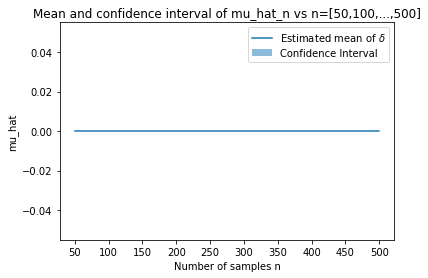

In [21]:
# similar to 3a, repeat for n = [50, ..., 500]
mean = []
std = []
for n in range(50, 550, 50):
  mu_hat_n_samples = (resnet_test_3[:n]).mean(axis=0)
  print(f"mu_hat for {n} samples: {mu_hat_n_samples}")
  mean_ = mu_hat_n_samples.mean()
  std_ = mu_hat_n_samples.std()
  mean.append(mean_)
  std.append(std_)

# plot the mean and the confidence interval of mu_hat_n vs n
mean = torch.FloatTensor(mean)
std = torch.FloatTensor(std)
x = np.arange(k) # populate x axis
plt.plot(x, mean, label="Estimated mean of $\delta$")
plt.fill_between(x, mean - std, mean + std, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.legend()
plt.xticks(np.arange(10), labels=range(50, 550, 50))
plt.xlabel("Number of samples n")
plt.ylabel("mu_hat")
plt.title('Mean and confidence interval of mu_hat_n vs n=[50,100,...,500]')
plt.show()

**3e: IS relative error**

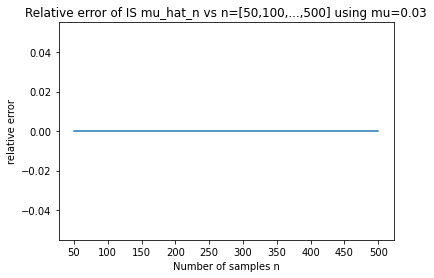

In [22]:
# similar to 3b, but use the IS result
mu = 0.03 #true mu value

relative_error = std/mu # compute the relative error

# PLOT THE RELATIVE ERROR VS n
plt.plot(relative_error)
plt.title("Relative error of IS mu_hat_n vs n=[50,100,...,500] using mu=0.03")
plt.xlabel("Number of samples n")
plt.ylabel("relative error")
plt.xticks(np.arange(10), labels=range(50, 550, 50))
plt.show()


IS can be more efficient than MC by estimating mu without needing all the samples, as long as the distribution is carefully selected. Problem with IS is that a wrong distribution will always underestimate.



In our case, IS is doing a worse job than MC because the distribution ptilde we use is not optimized properly, and it causes the likelihood ratio to go to zero (because of the exponential). Since the likelihood ratio is zero, the estimated mu, its mean and std become zero, giving us the previous plots where there's only  horizontal line at 0, with a confidence interval of 0 as well (basically extremely confident of the output estimation).